In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

COLORS = {'clean': '#A0C878', 'discarded': '#CD5656'}
EXCLUDE = ['mus', 'rara', 'ory', 'fsi', 'lyn', 'lut', 'mel', 'lep', 'bos', 'gen', 'her', 'dam', 'fel', 'can', 'mafo', 'capi', 'caae', 'ovor', 'caca']

In [2]:
FULL = pd.read_csv('full.csv')
CLEAN = pd.read_csv('clean.csv')

species_counts = pd.DataFrame({
    'full': FULL['species'].value_counts(),
    'clean': CLEAN['species'].value_counts()
}).fillna(0).astype(int)
species_counts['diff'] = species_counts['full'] - species_counts['clean']

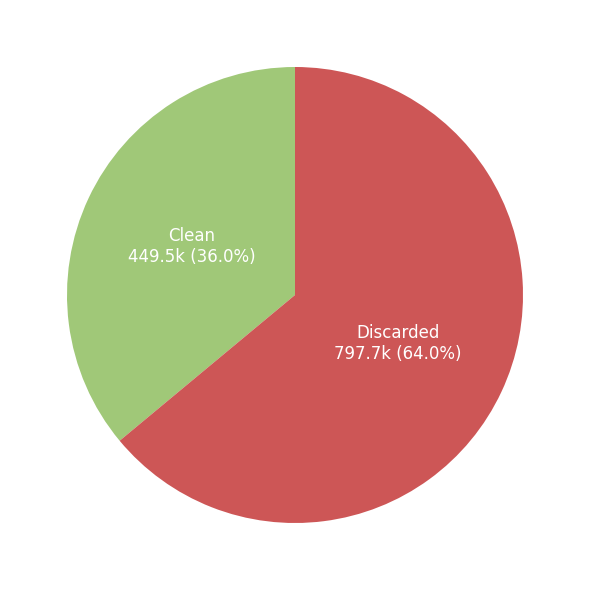

In [ ]:
def get_pie_chart(pie_data):
    plt.figure(figsize=(8, 6))

    wedges, _ = plt.pie(pie_data['Count'], startangle=90, autopct=None, textprops={'fontsize': 10}, colors=[COLORS['clean'], COLORS['discarded']])

    labels = [f"{row['Category']}\n{round(row['Count']/1000,1)}k ({row['Count'] / pie_data['Count'].sum() * 100:.1f}%)" for _, row in pie_data.iterrows()]
    for i, wedge in enumerate(wedges):
        x, y = wedge.center
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.5 * wedge.r * np.cos(np.radians(angle))
        y = 0.5 * wedge.r * np.sin(np.radians(angle))
        plt.text(x, y, labels[i], ha='center', va='center', fontsize=12, color='white')

    plt.tight_layout()
    plt.savefig('images/clean_diff_comparison.png', bbox_inches='tight', dpi=300)
    plt.show()

# Pie chart comparing full and diff count
plot_df = pd.DataFrame({
    'Category': ['Clean', 'Discarded'],
    'Count': species_counts[['clean', 'diff']].sum()
})
get_pie_chart(plot_df)

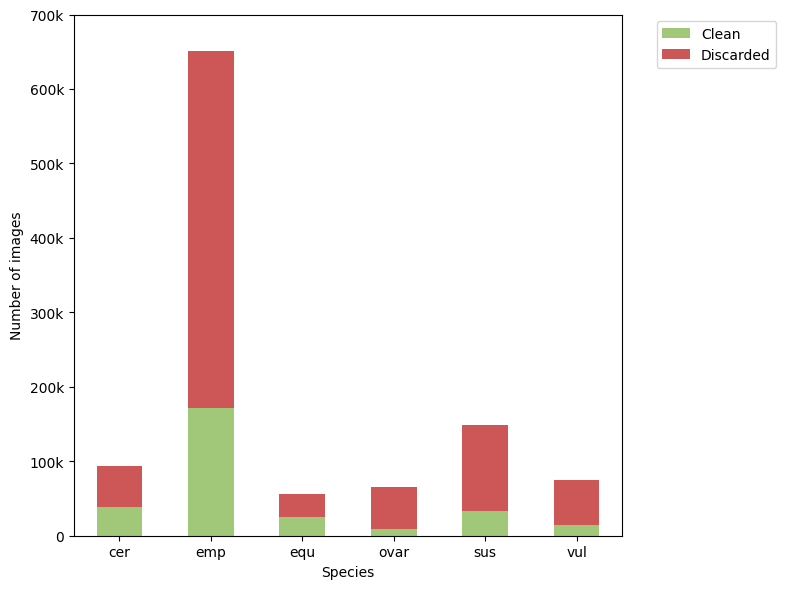

In [ ]:
def get_stacked_bar_chart(data):
    data.plot(kind='bar', stacked=True, color=[COLORS['clean'], COLORS['discarded']], figsize=(8, 6))
    plt.ylabel('Number of images')
    plt.xlabel('Species')
    plt.yticks(
        ticks=range(0, int(plot_df.sum(axis=1).max()) + 100000, 100000),
        labels=[f"{x//1000}k" if x > 0 else "0" for x in range(0, int(plot_df.sum(axis=1).max()) + 100000, 100000)]
    )
    plt.xticks(rotation=0)
    plt.legend(['Clean', 'Discarded'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('images/species_clean_diff_bar.png', bbox_inches='tight', dpi=300)
    plt.show()

# Plot the difference between FULL and CLEAN
plot_df = species_counts[~species_counts.index.str.contains('|'.join(EXCLUDE))][['clean', 'diff']]
get_stacked_bar_chart(plot_df)